# Android App Market Data Analysis

## Stage 1:

### Preparing the data

In [1]:
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot as plt
from seaborn import distplot
from seaborn import FacetGrid
from seaborn import jointplot
from seaborn import stripplot

In [2]:
data = read_csv('datasets/apps.csv')
appsData = data.copy()

#### Explore the data

In [3]:
appsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


Here, we can see there are 9659 entries in the dataset with non-null int64 (2 columns), non-null objects (10 columns) and non-null float (2 columns)

Let's check for null values in the dataset

In [4]:
appsData.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

From here, we can directly deduce that about 15% of the game in this dataset do not have rating

Let's look at a random sample in the dataset

In [5]:
appsData.sample(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8081,9201,EB Experience,LIFESTYLE,NaN,0,1.8,1+,Free,0,Everyone,Lifestyle,"October 19, 2017",1,4.0.3 and up
4257,5210,FaceApp,PHOTOGRAPHY,4.4,346681,7.1,"10,000,000+",Free,0,Everyone,Photography,"February 10, 2018",2.0.949,4.4 and up
4241,5194,Learn Artificial Intelligence,FAMILY,4.6,27,4.2,"10,000+",Free,0,Everyone,Education,"July 14, 2018",1.1.4,4.1 and up
187,187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
9236,10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,"50,000,000+",Free,0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
8945,10105,EY Belgium Inhouse Day 2018,EVENTS,NaN,0,24.0,10+,Free,0,Everyone,Events,"May 14, 2018",18.4.8.0,4.1 and up
5867,6900,Black & White Camera - Lovely BW,PHOTOGRAPHY,4.2,329,4.8,"100,000+",Free,0,Everyone,Photography,"November 13, 2017",1.1.0,4.4 and up
9428,10603,Florida Travel Guide - TOURIAS,TRAVEL_AND_LOCAL,3.8,80,37.0,"10,000+",Free,0,Everyone,Travel & Local,"July 30, 2018",3.21,4.0 and up
5854,6887,VictronConnect,TOOLS,3.8,400,NaN,"50,000+",Free,0,Everyone,Tools,"July 5, 2018",4.8,4.1 and up
5338,6346,Phonics Puzzles,FAMILY,3.8,4,54.0,100+,Paid,$2.99,Everyone,Educational,"August 27, 2016",1.8.2,2.3 and up


## Stage 2:

## Data cleaning

Some of the columns in the dataset are not in their correct type such as Price (which is an object that need to be float or integer) and Last updated (which is an object that need to be a date format)

- Price column

Let's just remove the \$ signe because we already know that the currency used is dollars

In [6]:
appsData['Price']=appsData['Price'].astype(str).str.replace('$','')

# Now, let's convert the column into float
appsData['Price']=appsData['Price'].apply(lambda x: float(x))

/tmp/ipykernel_6851/2448821718.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appsData['Price']=appsData['Price'].astype(str).str.replace('$','')


- Last updated column

Let's convert it into pandas dateframe

In [7]:
appsData['Last Updated'] = to_datetime(appsData['Last Updated'])

## Stage 3:

### Visualization

Let's see all categories of app that is presented in the dataset with their respective number

Text(0.5, 1.0, 'ANDROID APPS CATEGORY')

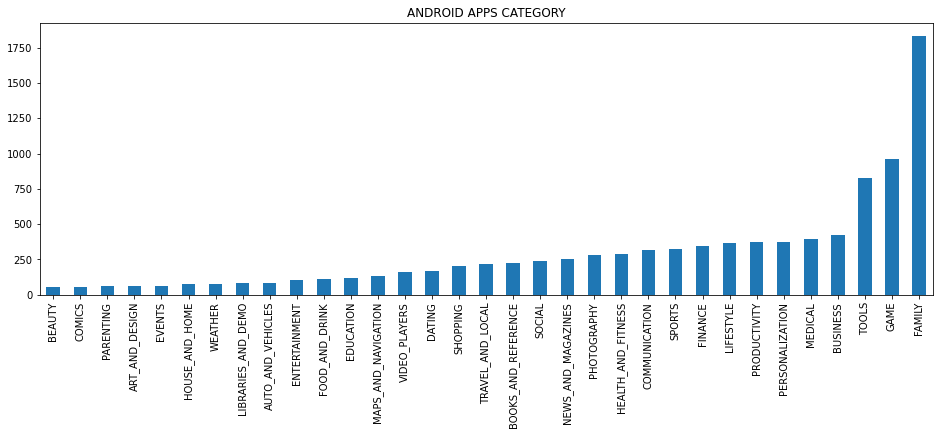

In [8]:
plt.figure(figsize=(16,5))
appsData['Category'].dropna().value_counts().sort_values(ascending=True).plot(kind='bar')
plt.title('ANDROID APPS CATEGORY')

From this plot, we can see that Family app is in great number and game apps comes after in the dataset

Now, let's see all apps' rating with the help of distplot from seaborn

/home/mamy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

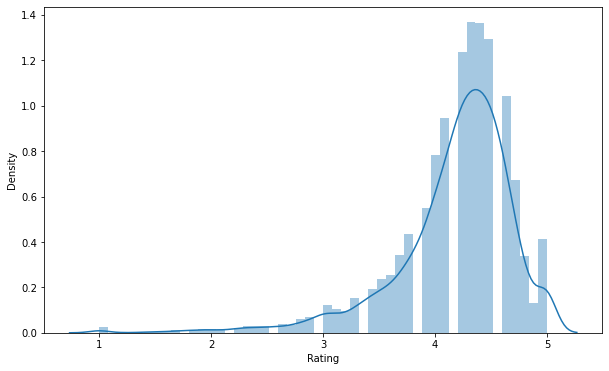

In [9]:
plt.figure(figsize=(10,6))
distplot(appsData['Rating'],kde=True)

In [10]:
# Average rating of all apps is
appsData['Rating'].mean()

4.173243045387998

On a scale of 1 to 5, the majority of the app in this dataset is highly rated

Let's see which type of game is more rated than the other one

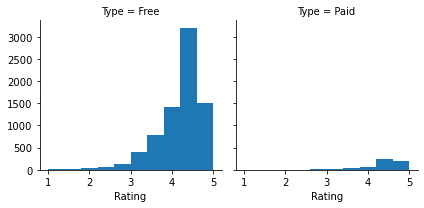

In [11]:
Type_rating = FacetGrid(appsData, col='Type')
ax = Type_rating.map(plt.hist, 'Rating')

- ##### Free app

Let's see the relation between the size of the apps and its rating

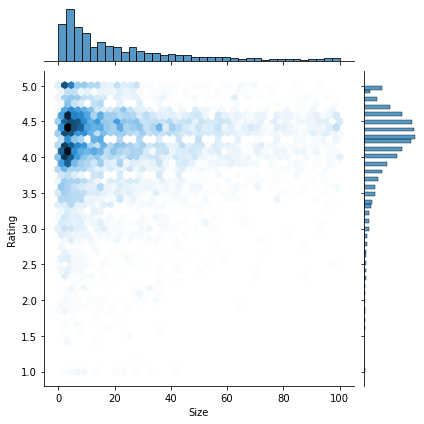

In [12]:
freeApp = appsData[appsData['Type']=='Free']
jointplot(x=freeApp['Size'], y=freeApp['Rating'], kind='hex')

- ##### Paid app

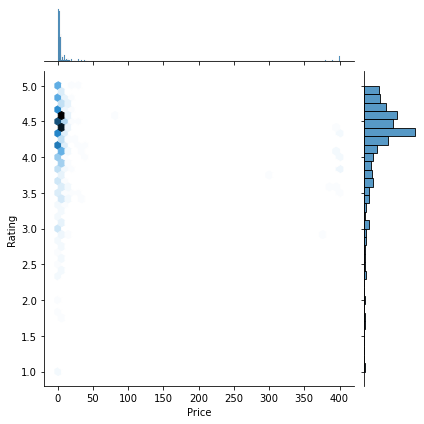

In [13]:
paidApp = appsData[appsData['Type']=='Paid']
jointplot(x=paidApp['Price'], y=paidApp['Rating'], kind='hex')

We conclude here that, the type of the apps affect its rating.
- Users prefered free apps over paid apps.
- The majority of the well rated apps have size under 20 MB. (Some users have a limited internet connexion and/or limited disk space )
- The majority of paid apps which got rating between 4 and 5 cost under $30 

Let's plot the price of the apps according to the category

<AxesSubplot:xlabel='Price', ylabel='Category'>

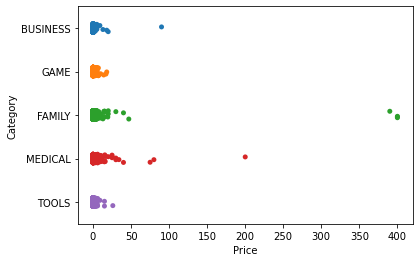

In [14]:
# Let's just select 5 of the most popular category in the data
popApps = appsData[appsData['Category'].isin(['FAMILY','GAME','TOOLS','BUSINESS','MEDICAL'])]
stripplot(x='Price',y='Category',data=popApps)

All the apps are in a reasonable price which below $50

- The most expansive costs about $400 which is a family apps

- And the other one costs $200 which belongs to the medical category